# Problem Set 8 Solutions

## 18.330 Intro to Numerical Analysis (MIT, Spring 2019) 

Henrik Ronellenfitsch & Boya Song

In [1]:
using PyPlot
PyPlot.svg(true);

## Problem 1. Fixing the Gibbs phenomenon. (25 points)

### (a)
Let $F$ be the DFT matrix of size $2N \times 2N$. Then

\begin{align}
\hat{g}_\nu = (F\mathbf{g})_\nu & = \frac{1}{\sqrt{2N}} \sum_{n=0}^{2N-1} \exp\left(-\frac{2\pi i}{2N}n\nu\right)g_n\\
& = \frac{1}{\sqrt{2N}} \left[\sum_{n=0}^{N-1} \exp\left(-\frac{2\pi i}{2N}n\nu\right)g_n + \sum_{n=N}^{2N-1} \exp\left(-\frac{2\pi i}{2N}n\nu\right)g_{n}\right]\\
& = \frac{1}{\sqrt{2N}} \left[\sum_{n=0}^{N-1} \exp\left(-\frac{2\pi i}{2N}n\nu\right)f_n + \sum_{n=0}^{N-1} \exp\left(-\frac{2\pi i}{2N}(n+N)\nu\right)f_{N-1-n}\right]\\
& = \frac{1}{\sqrt{2N}} \left[\sum_{n=0}^{N-1} \exp\left(-\frac{2\pi i}{2N}n\nu\right)f_n + \sum_{m=0}^{N-1} \exp\left(-\frac{2\pi i}{2N}(N-1-m+N)\nu\right)f_{m}\right]\\
& = \frac{1}{\sqrt{2N}} \left[\sum_{n=0}^{N-1} \exp\left(-\frac{2\pi i}{2N}n\nu\right)f_n + \sum_{m=0}^{N-1} \exp\left(\frac{2\pi i}{2N}(1+m)\nu\right)f_{m}\right]\\
& = \frac{1}{\sqrt{2N}}\sum_{n=0}^{N-1}  \left[\exp\left(-\frac{\pi i}{2N}2n\nu\right) + \exp\left(\frac{\pi i}{2N}(2n+2)\nu\right)\right] f_n\\
&= \frac{1}{\sqrt{2N}}  \exp\left(\frac{\pi i}{2N}\nu\right)\sum_{n=0}^{N-1}  \left[\exp\left(-\frac{\pi i}{2N}(2n+1)\nu\right) + \exp\left(\frac{\pi i}{2N}(2n+1)\nu\right)\right] f_n\\
& = \sqrt{2N}\exp\left(\frac{\pi i}{2N}\nu\right) \sum_{n=0}^{N-1}  \frac{1}{N}\cos\left(\frac{\pi }{2N}(2n+1)\nu\right) f_n
\end{align}
for $\nu = 0,\dots, 2N-1$.

Let DCT denote the descrete cosine transform, defined as 
$$\text{DCT}[f]_\nu = \frac{1}{N}\sum_{n=0}^{N-1}  \cos\left(\frac{\pi }{2N}(2n+1)\nu\right) f_n \, \, \text{for }\nu=1,\dots, N-1.$$ 
Then 
\begin{align}
\hat{g}_\nu = \sqrt{2 N}\exp\left(\frac{\pi i}{2N}\nu\right)\text{DCT}[f]_\nu\implies \text{DCT}[g]_\nu = \begin{cases}
\frac{1}{\sqrt{2N}}\exp\left(-\frac{\pi i}{2N}\nu\right)\hat{g}_\nu & \nu = 0, \dots, N-1\\
0 & \nu=N,\dots,2N-1
\end{cases}
\end{align}

Notice that when $\nu=N$, $\cos\left(\frac{\pi }{2N}(2n+1)\nu\right) = \cos\left(\frac{\pi }{2}(2n+1)\right) =0 $ for any $n=0, \dots, N-1$, therefore $\hat{g}_N = 0$ always. Additionally, 
\begin{align}
\hat{g}_{2N-\nu} & = \frac{2}{\sqrt{2N}}  \exp\left(\frac{\pi i}{2N}(2N-\nu)\right) \sum_{n=0}^{N-1} \cos\left(\frac{\pi }{2N}(2n+1)(2N-\nu)\right) f_n\\
& =  \frac{2}{\sqrt{2N}} (-1)  \exp\left(-\frac{\pi i}{2N}\nu\right) \sum_{n=0}^{N-1} \cos\left(-\frac{\pi }{2N}(2n+1)\nu + \pi (2n-1) \right) f_n\\
& =  \frac{2}{\sqrt{2N}} (-1)  \exp\left(-\frac{\pi i}{2N}\nu\right) \sum_{n=0}^{N-1} (-1)\cos\left(\frac{\pi }{2N}(2n+1)\nu\right) f_n \\
& = \frac{2}{\sqrt{2N}}  \overline{\exp\left(\frac{\pi i}{2N}\nu\right)} \sum_{n=0}^{N-1}\cos\left(\frac{\pi }{2N}(2n+1)\nu\right) f_n \\
& = \overline{\frac{2}{\sqrt{2N}}  \exp\left(\frac{\pi i}{2N}\nu\right) \sum_{n=0}^{N-1}\cos\left(\frac{\pi }{2N}(2n+1)\nu\right) f_n} \\
& = \overline{\hat{g}_{\nu}} \,\,\,\,\,\text{ for }\nu=1, \dots, N-1
\end{align}
Therefore $\hat{g}$ has $2N-1-(N-1) = N$ independent coefficients. 
### (b)

\begin{align}
g_n & = \sum_{\nu=0}^{2N-1} \exp\left(\frac{2\pi i}{2N} \nu n\right) \hat{g}_\nu\\
& = \hat{g}_0 + \sum_{\nu=1}^{N-1} \exp\left(\frac{2\pi i}{2N} \nu n\right) \hat{g}_\nu + 0 + \sum_{\nu=N+1}^{2N-1} \exp\left(\frac{2\pi i}{2N} \nu n\right) \hat{g}_\nu\\
& = \hat{g}_0 + \sum_{\nu=1}^{N-1} \exp\left(\frac{2\pi i}{2N} \nu n\right) \hat{g}_\nu + \sum_{\nu=1}^{N-1} \exp\left(\frac{2\pi i}{2N} (2N-\nu) n\right) \hat{g}_{2N - \nu} \\
& = \hat{g}_0 + \sum_{\nu=1}^{N-1} \exp\left(\frac{2\pi i}{2N} \nu n\right) \hat{g}_\nu + \sum_{\nu=1}^{N-1} \exp\left(-\frac{2\pi i}{2N} \nu n\right) \hat{g}_{2N - \nu}\\
& = \hat{g}_0 + \sum_{\nu=1}^{N-1} \exp\left(\frac{2\pi i}{2N} \nu n\right) \hat{g}_\nu + \overline{\exp\left(-\frac{2\pi i}{2N} \nu n\right)} \overline{\hat{g}_{2N - \nu}}\\
& = \hat{g}_0 + 2\sum_{\nu=1}^{N-1}\text{Re}\left[\exp\left(\frac{2\pi i}{2N} \nu n\right) \hat{g}_\nu \right] \\
& = \hat{g}_0 + 2\sum_{\nu=1}^{N-1}\text{Re}\left[\exp\left(\frac{2\pi i}{2N} \nu n\right) \sqrt{2 N}\exp\left(\frac{\pi i}{2N}\nu\right)\text{DCT}[f]_\nu \right] \\
& = \sqrt{2N}\text{DCT}[f]_0 + 2\sqrt{2N}\sum_{\nu=1}^{N-1}\text{Re}\left[\exp\left(\frac{2\pi i}{2N} \nu (n+1)\right)\text{DCT}[f]_\nu \right] \\
& =  \sqrt{2N}\text{DCT}[f]_0 + 2\sqrt{2N}\sum_{\nu=1}^{N-1}\text{Re}\left[\exp\left(\frac{2\pi i}{2N} \nu (n+1)\right)\right]\text{DCT}[f]_\nu   \\
& \,\,\,\,\,\,\,\,\,\,\,\,\,\,\text{(as $\text{DCT}[f]_\nu$ is real for all $\nu$ when $\mathbf{f}$ is real)}\\
& =  \sqrt{2N}\text{DCT}[f]_0 + 2\sqrt{2N}\sum_{\nu=1}^{N-1}\cos\left(\frac{2\pi i}{2N} \nu (n+1)\right)\text{DCT}[f]_\nu 
\end{align}
### (c)

In [4]:
function my_dct(vec)
    n = length(vec);
    C = [cos.(float(i*j) *pi/(2.0*n)) for i in (0:n-1), j in (1:2:2n-1)]
    return (C*vec)./n
end

my_dct (generic function with 1 method)

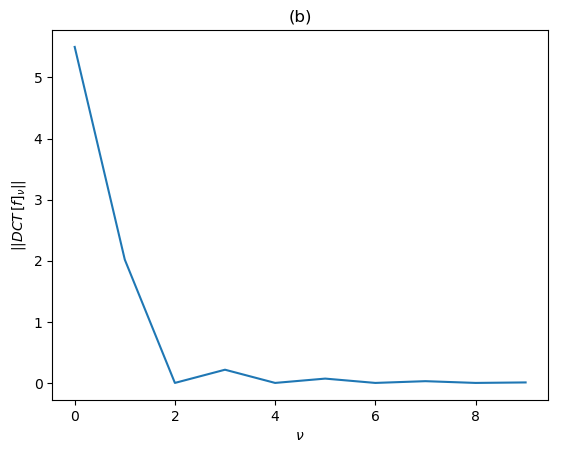

PyObject Text(28.000000000000007, 0.5, '$||DCT\\,[f]_\\nu||$')

In [5]:
f = collect(float(1:10));
g = [f[1:end]; f[end:-1:1]];
plot(0:9, abs.(my_dct(f)))
title("(b)")
xlabel(L"$\nu$")
ylabel(L"||DCT\,[f]_\nu||")

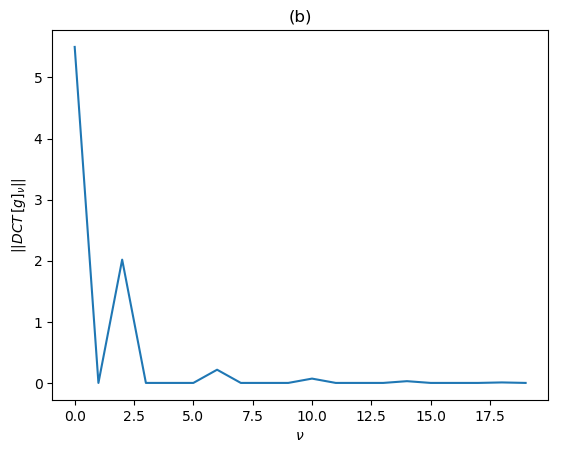

PyObject Text(28.000000000000007, 0.5, '$||DCT\\,[g]_\\nu||$')

In [6]:
title("(d)")
plot(0:19, abs.(my_dct(g)))
title("(b)")
xlabel(L"$\nu$")
ylabel(L"||DCT\,[g]_\nu||")

### (d)
The graphs above shows that DCT is a better loss-less compression algorithms in spectral space than DFT, as the absolute value of the non-zero entries of the DCT coefficents for the mirrored data is the same as the absolute value of the DCT coefficents for the original data.

## Problem 2. Fourier Transforms in higher dimensions. (25 points)

### (a)
Let $\mathbf{x} = [x,y,z]$. The Fourier coefficient of $f$ with wave vector $\mathbf{k}=[k_x, k_y, k_z]$ is 
\begin{align}
\tilde{f}\left(\mathbf{k}\right) = & \frac{1}{(2\pi)^3} \int_{\mathbb{R}^3} f(\mathbf{x}) e^{-i\mathbf{k}\cdot \mathbf{x}} d \mathbf{x} \\
= & \frac{1}{(2\pi)^3} \int_{\mathbb{R}^3} \exp\left[-\frac{\sigma_x}{2} x^2 - ik_x x\right] \exp\left[-\frac{\sigma_y}{2} y^2 - ik_y y\right] \exp\left[-\frac{\sigma_z}{2} z^2 - ik_z z\right] d \mathbf{x}\\
=& \left( \frac{1}{2\pi} \int_{\mathbb{R}} \exp\left[-\frac{\sigma_x}{2} x^2 - ik_x x\right]  dx \right)\left(\frac{1}{2\pi}\int_{\mathbb{R}} \exp\left[-\frac{\sigma_y}{2} y^2 - ik_y y\right] dy \right)\left(\frac{1}{2\pi}\int_{\mathbb{R}} \exp\left[-\frac{\sigma_z}{2} z^2 - ik_z z\right] dz\right)\\
=&\left( \frac{1}{2\pi} \exp\left[-\frac{k_x^2}{2 \sigma_x}\right] \int_{\mathbb{R}} \exp\left[-\frac{\sigma_x}{2} x^2 - ik_x x - \frac{-k_x^2}{2\sigma_x}\right]  dx \right) \left( \frac{1}{2\pi} \exp\left[-\frac{k_y^2}{2 \sigma_y}\right] \int_{\mathbb{R}} \exp\left[-\frac{\sigma_y}{2} y^2 - ik_y y - \frac{-k_y^2}{2\sigma_y}\right]  dy \right)\\
& \left( \frac{1}{2\pi} \exp\left[-\frac{k_z^2}{2 \sigma_z}\right] \int_{\mathbb{R}} \exp\left[-\frac{\sigma_z}{2} z^2 - ik_z z - \frac{-k_z^2}{2\sigma_z}\right]  dz \right)\\
=&\exp\left[-\frac{k_x^2}{2 \sigma_x}-\frac{k_y^2}{2 \sigma_y} - \frac{k_z^2}{2 \sigma_z}\right] \left( \frac{1}{2\pi} \int_{\mathbb{R}} \exp\left[-\left(\sqrt{\frac{\sigma_x}{2}}x + \frac{ik_x}{\sqrt{2\sigma_x}}\right)^2\right] dx  \right) \left( \frac{1}{2\pi} \int_{\mathbb{R}} \exp\left[-\left(\sqrt{\frac{\sigma_y}{2}}x + \frac{ik_y}{\sqrt{2\sigma_y}}\right)^2\right] dy  \right) \\
& \left( \frac{1}{2\pi} \int_{\mathbb{R}} \exp\left[-\left(\sqrt{\frac{\sigma_z}{2}}x + \frac{ik_z}{\sqrt{2\sigma_z}}\right)^2\right] dz\right)\\
= & \exp\left[-\frac{k_x^2}{2 \sigma_x}-\frac{k_y^2}{2 \sigma_y} - \frac{k_z^2}{2 \sigma_z}\right] \frac{1}{\sqrt{2\pi\sigma_x}}\frac{1}{\sqrt{2\pi\sigma_y}}\frac{1}{\sqrt{2\pi\sigma_z}}\\
= & \exp\left[-\frac{k_x^2}{2 \sigma_x}-\frac{k_y^2}{2 \sigma_y} - \frac{k_z^2}{2 \sigma_z}\right] \frac{1}{\sqrt{8\pi^3\sigma_x\sigma_y\sigma_z}}
\end{align}

### (b)
Let $\mathbf{x} = [x,y,z]$. The Fourier coefficient of $f$ with wave vector $\mathbf{k}=[k_x, k_y, k_z]$ is 
\begin{align}
\tilde{f}\left(\mathbf{k}\right) = & \frac{1}{(2\pi)^3} \int_{\mathbb{R}^3} f(\mathbf{x}) e^{-i\mathbf{k}\cdot \mathbf{x}} d \mathbf{x} \\
=& \frac{1}{(2\pi)^3} \int_{\mathbb{R}^3} \frac{\exp\left(-i\mathbf{k}\cdot \mathbf{x} - \kappa ||\mathbf{x}||\right)}{||\mathbf{x}||} d \mathbf{x}
\end{align}

A convenient way of evaluating 3D integrals like this is to use polar coordinates in a coordinate system in which $\mathbf{k}$ points in the z direction. In this coordinate system we have $\mathbf{k}\cdot \mathbf{x} = kr\cos\theta$ where $k = ||\mathbf{k}||$ and $d\mathbf{x} = r^2 \sin\theta drd\theta d\phi$, so the integral becomes

\begin{align}
\tilde{f}\left(\mathbf{k}\right) = & \frac{1}{(2\pi)^3} \int_0^\infty \int_0^\pi \int_0^{2\pi} \frac{\exp\left(-ikr\cos\theta - \kappa r\right)}{r} r^2 \sin\theta d\phi d\theta  dr\\
=& \frac{1}{(2\pi)^2} \int_0^\infty \exp\left(- \kappa r\right) r \int_0^\pi \exp\left(-ikr\cos\theta \right) \sin\theta  d\theta  dr\\
=& \frac{1}{(2\pi)^2} \int_0^\infty \exp\left(- \kappa r\right) r \frac{2}{kr}\sin\left(kr\right)  dr \\
=& \frac{1}{2\pi^2 k} \int_0^\infty \exp\left(- \kappa r\right) \sin\left(kr\right)  dr \\
=& \frac{1}{2\pi^2 k} \int_0^\infty \exp\left(- \kappa r\right) \frac{1}{2i}\left[\exp(ikr)-\exp(-ikr)\right]  dr\\
=& \frac{1}{4i\pi^2 k} \int_0^\infty\exp(ikr- \kappa r)-\exp(-ikr- \kappa r)  dr\\
=& \frac{1}{4i\pi^2 k} \left[\frac{1}{ik-\kappa}(0-1) - \frac{1}{-ik-\kappa}(0-1)\right]\\
=& \frac{1}{4i\pi^2 k} \left[\frac{1}{-ik+\kappa} - \frac{1}{ik+\kappa}\right]\\
=& \frac{1}{4i\pi^2 k} \frac{2ik}{k^2+\kappa^2}\\
=& \frac{1}{2\pi^2 } \frac{1}{k^2+\kappa^2}
\end{align}

### (c)
The Fourier coefficient of $f$ with wave vector $\mathbf{k}$ is 
\begin{align}
\tilde{f}\left(\mathbf{k}\right) = & \frac{1}{(2\pi)^n} \int_{\mathbb{R}^n} f(\mathbf{x}) e^{-i\mathbf{k}\cdot \mathbf{x}} d \mathbf{x} \\
=& \frac{1}{(2\pi)^n} \int_{\mathbb{R}^n} \exp(-\mathbf{x}^T A\mathbf{x}-i\mathbf{k}\cdot \mathbf{x}) d \mathbf{x} 
\end{align}
$A$ is symmetric positive definite implies that $A$ is invertible. Therefore we have
\begin{align}
\mathbf{x}^T A\mathbf{x}+i\mathbf{k}\cdot \mathbf{x} = \left(\mathbf{x} + \frac{i}{2}A^{-1}\mathbf{k}\right)^T A \left(\mathbf{x} + \frac{i}{2}A^{-1}\mathbf{k}\right) + \frac{1}{4}\mathbf{k}^TA^{-1}\mathbf{k}
\end{align}
Plug the equation above to the integral, we have
\begin{align}
\tilde{f}\left(\mathbf{k}\right) =& \frac{1}{(2\pi)^n} \int_{\mathbb{R}^n} \exp\left[-\left(\mathbf{x} + \frac{i}{2}A^{-1}\mathbf{k}\right)^T A \left(\mathbf{x} + \frac{i}{2}A^{-1}\mathbf{k}\right) - \frac{1}{4}\mathbf{k}^TA^{-1}\mathbf{k}\right] d \mathbf{x} \\
=& \frac{1}{(2\pi)^n}\exp\left[-\frac{1}{4}\mathbf{k}^TA^{-1}\mathbf{k}\right] \int_{\mathbb{R}^n} \exp\left[-\left(\mathbf{x} + \frac{i}{2}A^{-1}\mathbf{k}\right)^T A \left(\mathbf{x} + \frac{i}{2}A^{-1}\mathbf{k}\right)\right] d \mathbf{x} 
\end{align}

Let $\mathbf{y} = \mathbf{x} + \frac{i}{2}A^{-1}\mathbf{k}$. Then the integral simplifies to a multi-variable Gaussian: 

\begin{align}
\tilde{f}\left(\mathbf{k}\right) =& \frac{1}{(2\pi)^n}\exp\left[-\frac{1}{4}\mathbf{k}^TA^{-1}\mathbf{k}\right] \int_{\mathbb{R}^n} \exp\left[-\mathbf{y}^T A \mathbf{y}\right] d \mathbf{x} \\
=& \frac{1}{(2\pi)^n}\exp\left[-\frac{1}{4}\mathbf{k}^TA^{-1}\mathbf{k}\right] \sqrt{\frac{\pi^n}{\det A}}\\
=& \frac{1}{2^n\sqrt{\pi^n\det A}}\exp\left[-\frac{1}{4}\mathbf{k}^TA^{-1}\mathbf{k}\right] 
\end{align}

## Problem 3. Solving special linear systems with the FFT. (25 points)

### (a)
A (circular) convolution of the first column $\mathbf{c}$ with $\mathbf{x}$ is a vector of length $n$, where the $k$-th entry fo the vector is 

\begin{align}
(\mathbf{c} * \mathbf{x})_k & = \sum_{j=0}^{n-1}c_{(k-j \,\text{mod}\, n)} \, x_j \\
& = c_k x_0 + c_{k-1} x_1 + \dots + c_0 x_k + c_{n-1} c_{k+1} + \dots + c_{k+1} x_{n-1}
\end{align}

for $k = 0, \dots, n-1$. It has the same value of the inner product of $k$-th row of $C$ and $\mathbf{x}$. 
### (b)
The $l$-th element of the descrete Fourier tansformation of $\mathbf{c}*\mathbf{x}$ is 
$$\text{DFT}[\mathbf{c}*\mathbf{x}]_l = \mathbf{\hat{c}}_l \mathbf{\hat{x}}_l  $$

Therefore we can solve the system by first find $\mathbf{\hat{x}}$

$$
\mathbf{\hat{c}}_l  \mathbf{\hat{x}}_l  = \mathbf{\hat{b}}_l \implies  \mathbf{\hat{x}}_l = \frac{\mathbf{\hat{b}}_l}{\mathbf{\hat{c}}_l}
$$

for $l=0, \dots, n-1$, then apply inverse discrete Fourier transform to find $\mathbf{x}$

$$
\mathbf{x} = \text{IDFT}[\mathbf{\hat{x}}]
$$
### (c)


In [7]:
using FFTW

function solve_circulant(c, b)
    """ Solve the linear system C x = b
    where C is a circulant matrix with first column c.
    """
    
    return real(ifft(fft(b)./fft(c)))
end

function circulant_matrix(c)
    """ Construct a circulant matrix C with first column c.
    """
    n = length(c)
    C = zeros(n, n)
    for i=1:n
        C[i:end,i] = c[1:n-i+1]
        C[1:i-1,i] = c[n-i+2:end]
    end
    
    return C
end

circulant_matrix (generic function with 1 method)

In [8]:
# test the circulant matrix function
c = [1, 2, 3, 4, 5]
C = circulant_matrix(c)

5×5 Array{Float64,2}:
 1.0  5.0  4.0  3.0  2.0
 2.0  1.0  5.0  4.0  3.0
 3.0  2.0  1.0  5.0  4.0
 4.0  3.0  2.0  1.0  5.0
 5.0  4.0  3.0  2.0  1.0

In [9]:
# test linear solver using FFT
b = [1, 1, 1, 1, 1]

# Solution using FFT
solve_circulant(c, b)

5-element Array{Float64,1}:
 0.06666666666666667
 0.06666666666666667
 0.06666666666666667
 0.06666666666666667
 0.06666666666666667

In [10]:
# Solution using backslash
C \ b

5-element Array{Float64,1}:
 0.06666666666666668
 0.06666666666666667
 0.06666666666666667
 0.06666666666666667
 0.06666666666666667

In [11]:
# Some timings

function time_solvers(N)
    c = rand(N)
    b = rand(N)
    C = circulant_matrix(c)
    
    time_bs = @elapsed C \ b
    time_fft = @elapsed solve_circulant(c, b)
    
    return time_bs, time_fft
end

time_solvers (generic function with 1 method)

In [12]:
Ns = 10.0 .^(1:0.5:4.5)

timings = [time_solvers(Int64(trunc(N))) for N in Ns]
times_bs, times_fft = zip(timings...)

Base.Iterators.Zip{NTuple{8,Tuple{Float64,Float64}}}(((1.3579e-5, 9.0314e-5), (0.000136584, 0.000586766), (0.000420112, 0.000229888), (0.001979476, 0.002059075), (0.02051825, 0.000382695), (0.400400179, 0.015586475), (5.883505198, 0.001535224), (223.78506946, 0.142725616)))

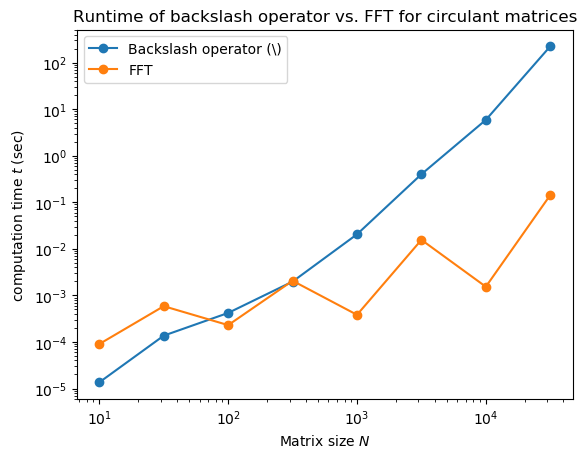

PyObject <matplotlib.legend.Legend object at 0x14b548b38>

In [13]:
figure()

loglog(Ns, times_bs, "o-", label=raw"Backslash operator (\)")
loglog(Ns, times_fft, "o-", label="FFT")

xlabel(L"Matrix size $N$")
ylabel(L"computation time $t$ (sec)")
title("Runtime of backslash operator vs. FFT for circulant matrices")

legend()

### (d)

In [14]:
c = rand(10^7)
b = rand(10^7)

# we don't have enough memory for the circulant matrix, so the backslash method fails
C = circulant_matrix(c)
x = C \ b

OutOfMemoryError: OutOfMemoryError()

In [15]:
# no issues for the FFT method
x = solve_circulant(c, b)

10000000-element Array{Float64,1}:
 -0.0015032629937733102 
  0.0006010627867665558 
  1.5246782402011319e-5 
  0.001514288934422406  
  0.0016548725059611785 
 -0.002727163623970296  
 -0.0006899322613971499 
  0.0014761727753638343 
  0.0005120980442695656 
  7.865641439971086e-5  
 -0.001072100949056898  
 -0.0027151465736854822 
  0.000904401267285215  
  ⋮                     
  0.0009365326721156751 
 -0.0009231877059658694 
  0.0012606504924349313 
  0.00025708308705820707
  0.00041292187614502715
 -0.0002099671894493307 
 -0.0013261597976108297 
  0.0008285925150584509 
  0.0009793148961025526 
 -0.002107125811837317  
 -0.001522751010973089  
 -0.0016492100660379823 

## Problem 4. More on circulant matrices. (25 points)

### (a)

Let $C$ be a circulant matrix defined by its first column $\mathbf{c}$ as in Problem 3. The $k$-th row of $C$ multiplying $\mathbf{v}_j$ is 
\begin{align}
(C\mathbf{v}_j)_k  & = \sum_{m=0}^{n-1} c_{(k-m \,\text{mod}\, n)}\, \zeta_j^m \\
& = \sum_{m=0}^{n-1} c_{(k-m \,\text{mod}\, n)} \,\zeta_j^{m-k} \zeta_j^k   \\
& =  \zeta_j^k \left(\sum_{m=0}^{n-1} c_{(k-m \,\text{mod}\, n)} \,\zeta_j^{m-k} \right)
\end{align}

for any $k=0, \dots, n-1$. As $ \zeta_j^n = 1$, 
$$
(C\mathbf{v}_j)_k  = \zeta_j^k \left( \sum_{m=0}^{n-1} c_{(k-m \,\text{mod}\, n)} \, \zeta_j^{m-k\text{ mod } n} \right) = \zeta_j^k(C\mathbf{v}_j)_1 
$$

Therefore $\mathbf{v}_j$ is an eigenvector of $C$, with eigenvalue $(C\mathbf{v}_j)_1$, the value of first row of $C$ multiplying $\mathbf{v}_j$.
### (b)
For $k = 0, \dots, n-1$, $j=0, \dots, n-1$, the $kj$-th entry of $\frac{1}{\sqrt{n}}FV$ is
\begin{align}
\frac{1}{\sqrt{n}}(FV)_{jk} &= \frac{1}{n}\sum_{m=0}^{n-1}F_{jm}V_{mk} \\
&= \frac{1}{n}\sum_{m=0}^{n-1}\exp\left(\frac{-2\pi i }{n} jm \right) \exp\left(\frac{2\pi i }{n} mk\right)\\
&= \frac{1}{n}\sum_{m=0}^{n-1}\exp\left(\frac{-2\pi i }{n} m(j-k) \right) \\
&=\begin{cases}
\frac{1}{n} n = 1 & j=k\\
\frac{1}{n} 0 = 0 & j\neq k
\end{cases}
\end{align}
Therefore $\frac{1}{\sqrt{n}}FV$ equals the identity matrix. As both $F$ and $V$ are symmetric matrices, $V\frac{1}{\sqrt{n}}F = \frac{1}{\sqrt{n}}FV = I$. Thus $V^{-1} = \frac{1}{\sqrt{n}}F$. 
### (c)
The $j$-th discrete Fourier coefficient of $\mathbf{c}$ is the same as the eigenvalue of $C$ corresponding to eigenvector $\mathbf{v}_j$, as
\begin{align}
\hat{\mathbf{c}}_j = (F\mathbf{c})_j = \sum_{m=0}^{n-1}  \exp\left(-\frac{2\pi i}{n} jm \right) c_m  = \sum_{m=0}^{n-1}  c_m \zeta_j^{-m}  = \sum_{m=0}^{n-1} c_{(k-m \,\text{mod}\, n)} \,\zeta_j^{m-k} 
\end{align}

Therefore we can take the discrete Fourier transformation of $\mathbf{c}$ to get the eigenvalues of $C$. 
### (d)

In [16]:
exp(-pi*im)

-1.0 - 1.2246467991473532e-16im

In [17]:
using LinearAlgebra

c = [1 2 3 4 5]
C = circulant_matrix(c)

# Julia's eigenvalues
eigvals(C)

5-element Array{Complex{Float64},1}:
 14.999999999999991 + 0.0im               
               -2.5 + 3.4409548011779334im
               -2.5 - 3.4409548011779334im
 -2.500000000000002 + 0.8122992405822652im
 -2.500000000000002 - 0.8122992405822652im

In [18]:
# Eigenvalues are exactly the DFT of c
fft(c)

1×5 Array{Complex{Float64},2}:
 15.0+0.0im  -2.5+3.44095im  -2.5+0.812299im  -2.5-0.812299im  -2.5-3.44095im

In [19]:
function time_eigvals(N)
    c = rand(N)
    b = rand(N)
    C = circulant_matrix(c)
    
    time_eigvals = @elapsed eigvals(C)
    time_fft = @elapsed fft(c)
    
    return time_eigvals, time_fft
end

time_eigvals (generic function with 1 method)

In [20]:
Ns = 10.0 .^(1:0.5:3.5)

timings = [time_eigvals(Int64(trunc(N))) for N in Ns]
times_eigvals, times_fft = zip(timings...)

Base.Iterators.Zip{NTuple{6,Tuple{Float64,Float64}}}(((3.5541e-5, 3.955e-5), (0.000168557, 2.7408e-5), (0.003483479, 4.2479e-5), (0.038881997, 0.000101365), (0.564738136, 8.2036e-5), (11.124531177, 0.000367567)))

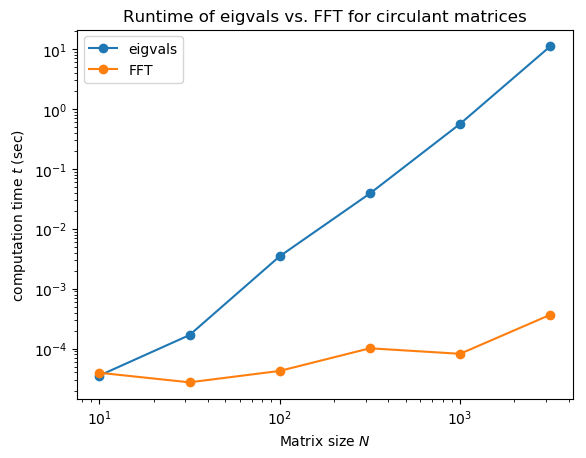

PyObject <matplotlib.legend.Legend object at 0x14b6897f0>

In [21]:
figure()

loglog(Ns, times_eigvals, "o-", label=raw"eigvals")
loglog(Ns, times_fft, "o-", label="FFT")

xlabel(L"Matrix size $N$")
ylabel(L"computation time $t$ (sec)")
title("Runtime of eigvals vs. FFT for circulant matrices")

legend()